<a href="https://colab.research.google.com/github/aramirezfr/Aircraft-Acquisition-Proposal/blob/master/CNN_Pneumonia_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pneumonia Image Binary Classifier Model** \
By: Adriana Ramirez Franco. \
Email: aramirezfr20@gmail.com

# Business Understanding

**About Pneumonia:** \
Pneumonia is a serious respiratory condition that can lead to severe complications, especially if not diagnosed early. Timely and accurate diagnosis is crucial to initiate appropriate treatment and reduce morbidity and mortality, particularly among vulnerable populations like children, the elderly, and individuals with compromised immune systems.


**Why not using traditional in person diagnosis by doctors?** \
Traditional diagnosis of pneumonia relies heavily on radiologists interpreting chest X-rays, which can be time-consuming and prone to human error, especially under high workloads or in resource-limited settings.

**How can we support a professional doctor's diagnosis?** \
To address these challenges, this project aims to develop a convolutional neural network (CNN)-based binary classification model to automatically identify pneumonia from chest X-ray images. By distinguishing between normal and pneumonia-affected lungs, the model will assist healthcare professionals in making quicker, more accurate decisions. This model can improve diagnostic efficiency, alleviate the burden on radiologists, enhance patient outcomes, and provide valuable support in remote or underserved areas where access to specialized radiology expertise is limited.

## Benefits of implementing a Medical Image Classifier

**Medical image classification using machine learning** is critically important for several reasons:  

### **1. Faster Diagnosis and Treatment**  
Convolutional neural networks (CNNs), can analyze medical images much faster than humans. This reduces the time required for diagnosis, enabling quicker initiation of treatment, which is particularly crucial for conditions like pneumonia, cancer, or strokes where delays can have life-threatening consequences.

### **2. Improved Accuracy and Consistency**  
Machine learning systems can match or exceed the diagnostic accuracy of radiologists in specific tasks, as they learn from large datasets and can identify patterns that may be difficult for human experts to detect. This ensures consistency in diagnosis, reducing human errors caused by fatigue or cognitive bias.

### **3. Addressing Resource Gaps**  
In many regions, especially remote or low-resource settings, there is a shortage of radiologists and specialized healthcare professionals. Machine learning models can act as decision-support tools to help non-specialists make informed diagnoses or prioritize cases that need expert attention.

### **4. Reduced Workload for Healthcare Professionals**  
With the increasing demand for medical imaging, radiologists often have to analyze hundreds of images per day. AI systems can help pre-screen images or highlight abnormal cases, allowing radiologists to focus their expertise on the most critical cases, improving workflow efficiency.

### **5. Continuous Learning and Scalability**  
Machine learning models can continuously improve as they are trained with new data, making them adaptable to emerging medical conditions. They are also scalable, meaning once a model is developed, it can be deployed across multiple healthcare systems globally with minimal modifications.

### **6. Enabling Preventive Healthcare**  
Automated image classification can also aid in early detection of diseases that may not exhibit symptoms initially, facilitating preventive interventions. For instance, AI models used for early screening of pneumonia or lung cancer can detect subtle abnormalities that might be missed in routine examinations.

In summary, machine learning-based medical image classification is transforming healthcare by enhancing diagnostic accuracy, improving efficiency, and expanding access to quality care, making it an essential tool for modern medicine.

# Data Understanding

1. **Source and Properties of the Data**:
   - This dataset, published by Paul Mooney on Kaggle, originates from the Guangzhou Women and Children’s Medical Center. It contains labeled chest X-ray images grouped into "Pneumonia" (with bacterial and viral categories) and "Normal."
   - The images are grayscale with consistent resolution, showing clear lung structures. The dataset is ideal for supervised machine learning tasks since each image is accurately labeled as pneumonia or healthy, making it a reliable choice for binary classification.



2. **Size of Data and Descriptive Statistics of Features**:
   - The dataset comprises 5,863 images, divided into training, validation, and test sets, enabling efficient model evaluation. The training set includes around 4,000 images, with a smaller validation and test set.
   - Key features include image pixel intensity values, which represent lung opacity patterns. The dataset contains approximately three times more pneumonia cases than normal ones, making it slightly imbalanced.

3. **Feature Suitability**:
   The primary feature—chest X-ray images—allows for visual detection of pneumonia markers, such as lung opacity and structure irregularities. This aligns well with the objective to classify cases of pneumonia versus healthy lungs based on these medical imaging patterns.



4. **Limitations of Using This Data**:
   - *Challenges*: The dataset's class imbalance (more pneumonia cases than normal) could affect model performance. The variation in image quality and possible label inconsistencies may also introduce noise, impacting model accuracy and generalizability.
   - *Generalization Limits*: Since the dataset was sourced from a specific medical center, models trained on it might not generalize well to X-rays from different machines or patient demographics.


For further details, refer to the Kaggle dataset page: [Chest X-Ray Images (Pneumonia) on Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia).

# Data Preparation

In [121]:
#Downloading the data file from Kaggle
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [122]:
#Unzip the data folder
!unzip chest-xray-pneumonia.zip -d data

Archive:  chest-xray-pneumonia.zip
replace data/chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [155]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report


import warnings
warnings.filterwarnings('ignore')

import os

-----------------

In [124]:
#setting the chest_ray folder a directory
directory=os.listdir('data/chest_xray')
print(directory) #listing contents of directory

['train', 'val', '__MACOSX', 'test', 'chest_xray']


In [125]:
#directories inside the chest_xray file
train_dir='data/chest_xray/train'
val_dir='data/chest_xray/val'
test_dir='data/chest_xray/test'

Using image_dataset_from directory.

In [126]:
#importing files
train=keras.utils.image_dataset_from_directory(
    directory=train_dir,
    shuffle=True,
    labels='inferred',
    label_mode='binary',
    batch_size=32,
    image_size=(150, 150))

test = keras.utils.image_dataset_from_directory (
    directory = test_dir,
    shuffle=True,
    labels = "inferred",
    label_mode='binary',
    batch_size = 32,
    image_size = (150,150))
validation = keras.utils.image_dataset_from_directory (
    directory = val_dir,
    shuffle=True,
    labels ="inferred",
    label_mode='binary',
    batch_size = 32,
    image_size = (150 , 150))

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [127]:
#checking the name of the classes in the files
print(train.class_names)
print(test.class_names)
print(validation.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


Each file in 'chest_xray' includes a set of images with **"Normal"** x-rays and another set of x-rays with **"Pneumonia"**.

------------------

In [128]:
#define directories of training images
pneumonia_dir = 'data/chest_xray/train/PNEUMONIA'
normal_dir = 'data/chest_xray/train/NORMAL'

#list files in each directory
pneumonia_files = os.listdir(pneumonia_dir)
normal_files = os.listdir(normal_dir)

len(pneumonia_files)+len(normal_files)

5216

There are 5216 images to train on that belong to the subgroups 'PNEUMONIA' and 'NORMAL'.

**Checking the images** in the files of the folder "Training" that contains the images of the x-rays that the model will train on.

In [ ]:
#plot the Images
def display_images(image_files, image_dir, num_images=5, title=''):
    plt.figure(figsize=(10, 5))
    plt.suptitle(title, fontsize=16)

    for i, image_name in enumerate(image_files[:num_images]):
        image_path = os.path.join(image_dir, image_name)
        img = mpimg.imread(image_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img, cmap='gray')  #using 'gray' for grayscale images
        plt.title(image_name)
        plt.axis('off')

#display images from PNEUMONIA class
display_images(pneumonia_files, pneumonia_dir, num_images=3, title='PNEUMONIA')

#display images from NORMAL class
display_images(normal_files, normal_dir, num_images=3, title='NORMAL')

In [ ]:
#checking the count of normal and x-rays with pneumonia
len(pneumonia_files), len(normal_files)

* Out of the 100% (5,216) training images available, 74% of them are Pneumonia images and 26% of them are Normal Lung images. This demonstrates class imbalance. \
* In an ideally balanced dataset, each class would have an equal number of instances, typically 50% for each class for a binary classification problem. \

In [ ]:
#plotting the count of pneumonia and normal class
# create a variable with the counts:
pneumonia_count = len(pneumonia_files)
normal_count = len(normal_files)

#define the labels and their corresponding counts
labels = ['Pneumonia', 'Normal']
counts = [pneumonia_count, normal_count]

#plot
plt.figure(figsize=(5, 5))
plt.bar(labels, counts) #labels on the x-axis and counts on the y-axis
plt.ylabel('Count')
plt.title('Class Imbalance')
plt.show()

## Data Augmentation:

Given that there is a severe class imbalance in the training class I will use ImageDataGenerator to create some synthetic images to help balance the class and help prevent overfitting.

In [111]:
#setting parameters
img_size=(100,100)
SHAPE=(100,100,3)
batch_size=32

In [130]:
from tensorflow.keras.applications.resnet50 import preprocess_input
#data generator for train and validation
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=False,
                             fill_mode='nearest')

#test data generator
test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [136]:
#applying the data generator
#training set
train_set=datagen.flow_from_directory(train_dir,
                                      class_mode='binary',
                                      target_size=img_size,
                                      batch_size=batch_size,
                                      #shuffle=False,
                                      seed=42)

val_set=datagen.flow_from_directory(val_dir,
                                      class_mode='binary',
                                      target_size=img_size,
                                      batch_size=batch_size,
                                      shuffle=False,
                                      seed=42)
test_set=test_datagen.flow_from_directory(test_dir,
                                      class_mode='binary',
                                      target_size=img_size,
                                      batch_size=batch_size,
                                      shuffle=False,
                                      seed=42)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
#use train_set, val_set and test_set for next steps

# Modeling:

## Model Architecture:

## Base trial model:

In [172]:
#set metrics
METRICS=['accuracy',
         tf.keras.metrics.Precision(name='precision'),
         tf.keras.metrics.Recall(name='recall')]

In [150]:
base_model = models.Sequential([

    #first convolutional layer
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,100, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    #second convolutional layer
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

    #flatten the feature maps
    layers.Flatten(),

    #fully connected layer
    layers.Dense(128, activation='relu'),

    #output layer with a single neuron for binary classification
    layers.Dense(1, activation='sigmoid')])

In [151]:
#compile the model
base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [146]:
#defining callbacks for early stopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping=[EarlyStopping(monitor='val_acc', patience=10),
                              ModelCheckpoint(filepath='best_model.keras',
                              monitor='val_acc',
                              save_best_only=True )]

In [ ]:
base_model.summary()

In [148]:
steps_per_epoch=len(train)//batch_size
validation_steps=len(test)//batch_size

In [152]:
#train base model
base_model_hist = base_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - acc: 0.5514 - loss: 127.4596 - precision: 0.5616 - recall: 0.5977 - val_acc: 0.5000 - val_loss: 24.1351 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 966ms/step - acc: 0.2745 - loss: 27.3569 - precision: 0.4136 - recall: 0.0572 - val_acc: 0.5000 - val_loss: 5.2679 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - acc: 0.8141 - loss: 1.9548 - precision: 0.8141 - recall: 1.0000 - val_acc: 0.5000 - val_loss: 3.6799 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 846ms/step - acc: 0.7052 - loss: 1.5911 - precision: 0.7122 - recall: 0.9863 - val_acc: 0.5000 - val_loss: 0.7162 - val_precision: 0.5000 - val_recall: 0.8750
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - acc: 0.6042 - loss: 0.6756 - precision: 0.7304 - recall: 0.7082 - val_acc: 0.4375 - val_loss: 0.7014 - val_precision: 0.4615 - val_recall: 0.7500
Epoch 

In [169]:
#evaluate base model
results_base_train=base_model.evaluate(test_set)
results_base_train

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 486ms/step - acc: 0.3425 - loss: 0.7385 - precision: 0.3055 - recall: 0.6667


[0.5973786115646362, 0.6426281929016113, 0.636215329170227, 1.0]

In [170]:
basetest_loss, basetest_accuracy, basetest_precision, basetest_recall = results_base_train

# Print the results
print(f"Test accuracy: {basetest_accuracy:.2f}")
print(f"Test precision: {basetest_precision:.2f}")
print(f"Test recall: {basetest_recall:.2f}")

Test accuracy: 0.64
Test precision: 0.64
Test recall: 1.00


In [198]:
#plot the training history
plt.plot(base_model_hist.history['accuracy'], label='train accuracy')
plt.plot(base_model_hist.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: 'accuracy'

## Testing Model 1:

In [188]:
#Adding a third layer and dropout layer to compare results with base model
test1_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    #extra third layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    #adding dropout layer
    Dropout(0.5),  #to prevent overfitting
    Dense(1, activation='sigmoid')  #output layer for binary classification
])

In [189]:
#compile the model
test1_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

In [190]:
#train the test1_model
test1_history = test1_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5815 - loss: 18.3573 - precision: 0.8202 - recall: 0.6838 - val_accuracy: 0.5000 - val_loss: 2.7537 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5451 - loss: 1.5622 - precision: 0.7762 - recall: 0.6118 - val_accuracy: 0.5000 - val_loss: 0.7610 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 935ms/step - accuracy: 0.6234 - loss: 0.6750 - precision: 0.7848 - recall: 0.6765 - val_accuracy: 0.5000 - val_loss: 1.0051 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7990 - loss: 0.5081 - precision: 0.7990 - recall: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.8066 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5819 - loss: 0.6720 - precision: 0.5974 - recall: 0.9005 - val_accuracy: 0.5625 - val_loss: 0.7827 - val_precision:

In [192]:
test1_results= test1_model.evaluate(test_set)
print("Evaluation results:", test1_results)

20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 370ms/step - accuracy: 0.8510 - loss: 0.3725 - precision: 0.6017 - recall: 0.4018
Evaluation results: [0.6984965205192566, 0.7003205418586731, 0.959276020526886, 0.5435897707939148]


In [193]:
test1_loss, test1_accuracy, test1_precision, test1_recall = test1_results

# Print the results
print(f"Test accuracy: {test1_accuracy:.2f}")
print(f"Test precision: {test1_precision:.2f}")
print(f"Test recall: {test1_recall:.2f}")

Test accuracy: 0.70
Test precision: 0.96
Test recall: 0.54


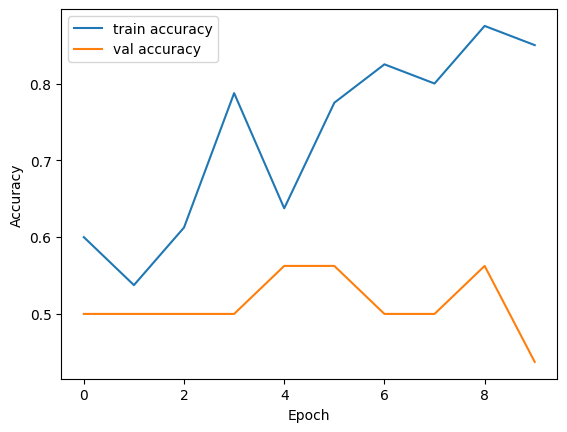

In [194]:
#plot the training history
plt.plot(test1_history.history['accuracy'], label='train accuracy')
plt.plot(test1_history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

MAIN MODEL TRIALLLLL

In [183]:
test2_model = models.Sequential([
    #input layer(32 filters, 3x3 kernel size, "relu" activation,input shape 150x150 to fit image generator function)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),

    #layer with 2x2 pool size
    layers.MaxPooling2D((2, 2)),

    #64 filters
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(), #flatten layer

    #Dense layer with 512 neurons
    layers.Dense(512, activation='relu'),#this dense layer input matches the flattened output

    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    #output layer: dense layer with 2 layers
    layers.Dense(1, activation='sigmoid')  #for binary classification
])


In [184]:
test2_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [179]:
#print summary model of architecture
test2_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 512)                 │           2,0

 Total params: 1,415,234 (5.40 MB)

 Trainable params: 1,411,138 (5.38 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [185]:
#train the model
test2_history = test2_model.fit(train_set,
                                 steps_per_epoch=steps_per_epoch,
                                 epochs=10,
                                 callbacks=early_stopping,
                                 validation_data=val_set,
                                 shuffle=False)


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5591 - loss: 0.7713 - precision: 0.8168 - recall: 0.5310 - val_accuracy: 0.4375 - val_loss: 1.4025 - val_precision: 0.4667 - val_recall: 0.8750
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5247 - loss: 0.9423 - precision: 0.7613 - recall: 0.5282 - val_accuracy: 0.5000 - val_loss: 1.7096 - val_precision: 0.5000 - val_recall: 0.8750
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 956ms/step - accuracy: 0.6694 - loss: 0.7380 - precision: 0.8586 - recall: 0.6688 - val_accuracy: 0.5000 - val_loss: 3.9945 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 939ms/step - accuracy: 0.6852 - loss: 0.7203 - precision: 0.8152 - recall: 0.7073 - val_accuracy: 0.5000 - val_loss: 4.2820 - val_precision: 0.5000 - val_recall: 1.0000
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6717 - loss: 0.6502 - precision: 0.8359 - recall: 0.7134 - val_accuracy: 0.5625 - val_loss: 4.0022 - val

In [186]:
test2_results= test2_model.evaluate(test_set)
print("Evaluation results:", test2_results)

20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 417ms/step - accuracy: 0.7686 - loss: 0.4866 - precision: 0.4627 - recall: 0.4725
Evaluation results: [0.5687832832336426, 0.7211538553237915, 0.8396226167678833, 0.6846153736114502]


In [187]:
test2_loss, test2_accuracy, test2_precision, test2_recall = test2_results

# Print the results
print(f"Test accuracy: {test2_accuracy:.2f}")
print(f"Test precision: {test2_precision:.2f}")
print(f"Test recall: {test2_recall:.2f}")

Test accuracy: 0.72
Test precision: 0.84
Test recall: 0.68


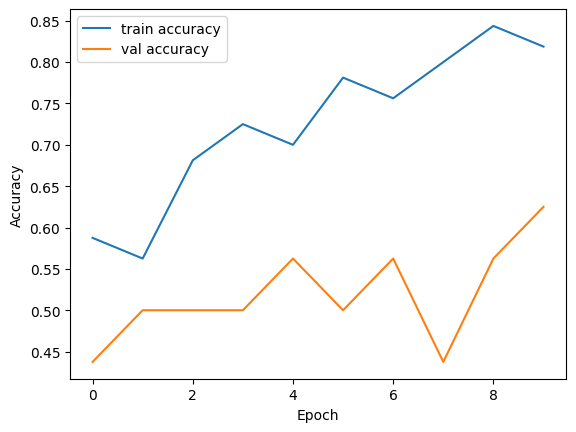

In [195]:
#plot the training history
plt.plot(test2_history.history['accuracy'], label='train accuracy')
plt.plot(test2_history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---------------------

## Train the model:

In [ ]:
history= model.fit(train,
                        epochs=10,
                        validation_data=test)

# Evaluation:

In [ ]:
#checking accuracy:
results_train= model.evaluate(train, batch_size=128)
results_train

In [ ]:
results_test= model.evaluate(test, batch_size=128)
results_test

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,10))

In [ ]:
#evaluating with testing image
#Evaluation of normal image
#using normal x-ray image
#test_image=tf.keras.utils.load_img('data/chest_xray/test/NORMAL/IM-0013-0001.jpeg',
                                   target_size=(150,150))

In [ ]:
#display test image
#plt.imshow(test_image)

In [ ]:
#expand dimensions to match expected input shape
#test_image=tf.keras.utils.img_to_array(test_image)
#test_image=np.expand_dims(test_image, axis=0)
#used trained model to make a prediction
#result=model.predict(test_image)

In [ ]:
#print(result)


Create a confusion Matrix to analyze the description of the performace of the classification model on the set of test data.

In [ ]:
cm= confusion_matrix(y_true=, y_pred=result)

In [ ]:
Create a classification report.

In [ ]:

y_pred=model.predict(test)
y_pred_classes = np.round(y_pred).astype(int)
#generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

#plot
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#Create a classification report.
report = classification_report(y_test, y_pred_classes)
print("Classification Report:\n", report)

# Summary:

## Results:

Training process(epochs?)\
how long does each epoch takes?\
total training time?\
results? \

true positives!!\
true negatives!!\
false positives??\
false negatives X (minimize) \